# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.098054e+01     7.358521e+00
 * time: 0.0017061233520507812
     1     2.834829e+01     4.927882e+00
 * time: 0.007244110107421875
     2     2.047660e+01     5.536378e+00
 * time: 0.011497020721435547
     3     1.531477e+01     5.530274e+00
 * time: 0.015347003936767578
     4     1.142133e+01     2.783116e+00
 * time: 0.019010066986083984
     5     1.076599e+01     3.453905e+00
 * time: 0.022217988967895508
     6     9.785147e+00     1.443469e+00
 * time: 0.025550127029418945
     7     9.183994e+00     1.939149e+00
 * time: 0.02855706214904785
     8     8.861989e+00     1.338095e+00
 * time: 0.03162407875061035
     9     8.603016e+00     1.355326e+00
 * time: 0.035079002380371094
    10     8.417668e+00     8.597544e-01
 * time: 0.03816413879394531
    11     8.281637e+00     6.791923e-01
 * time: 0.041889190673828125
    12     8.172785e+00     7.275475e-01
 * time: 0.04454302787780762
    13     8.111546e+00     6.085073e-0

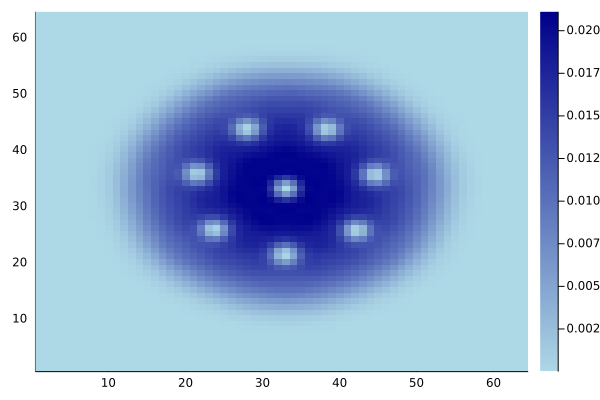

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)